# Eksplorasi dan Analisa Dataset - Air Quality Dataset

**Informasi Dataset**

Dataset merupakan sekumpulan pengukuran kualitas udara menggunakan *Air Quality Chemical Multisensor Device* yang diletakan di suatu kota di Italia. Pengukuran diambil dari daerah yang memiliki tingkat polusi cukup tinggi. Data diukur pada dari maret 2004 sampai februari 2005 dengan total 9358 instance data.

*Source*: https://archive.ics.uci.edu/dataset/360/air+quality

**Fitur Dataset**
Dataset memiliki 15 fitur yang terdiri dari

(Date & Time)
- Date -> Tanggal pengukuran
- Time -> Waktu pengukuran

(Air Pollution Measurements)
- CO(GT) -> Carbon Monoxide (CO) dalam mg/m³
- PT08.SI (CO) -> Pengukuran (CO) dari sensor
- NMHC(GT) -> Non-Methane Hydrocarbonds (NMHC) dalam µg/m³
- PT08.S2 (NMHC) → Pengukuran (NMHC) dari sensor
- C6H6(GT) → Benzene (C6H6) dalam µg/m³
- NOx(GT) → Nitrogen oxides (NOx) dalam ppb
- PT08.S3 (NOx) → Pengukuran NOx dari sensor
- NO2(GT) → Nitrogen dioxide (NO2) dalam µg/m³
- PT08.S4 (NO2) → Pengukuran NO2 dari sensor
- PT08.S5 (O3) → Pengukuran ozone (O3) dari sensor

(Weather Conditions)
- T → Temperature dalam °C
- RH → Relative Humidity (%)
- AH → Absolute Humidity (g/m³)

## Import Library

Untuk melakukan eksplorasi data, diperlukan beberapa library python. Berikut merupakan library yang akan digunakan

- pandas -> mengolah data dalam bentuk dataframe
- numpy -> melakukan komputasi numerik pada data
- matplotlib -> visualisasi data
- seaborn -> library visualisasi tambahan
- sklearn -> libarary machine learning untuk membantu data processing
- ucimlrepo -> library third party untuk import dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo

In [21]:
# fetch dataset dari sumber 
air_quality = fetch_ucirepo(id=360) 
  
# data (pandas dataframes) 
df = air_quality.data.features 
  
# informasi variable 
print(air_quality.variables) 

             name     role         type demographic  \
0            Date  Feature         Date        None   
1            Time  Feature  Categorical        None   
2          CO(GT)  Feature      Integer        None   
3     PT08.S1(CO)  Feature  Categorical        None   
4        NMHC(GT)  Feature      Integer        None   
5        C6H6(GT)  Feature   Continuous        None   
6   PT08.S2(NMHC)  Feature  Categorical        None   
7         NOx(GT)  Feature      Integer        None   
8    PT08.S3(NOx)  Feature  Categorical        None   
9         NO2(GT)  Feature      Integer        None   
10   PT08.S4(NO2)  Feature  Categorical        None   
11    PT08.S5(O3)  Feature  Categorical        None   
12              T  Feature   Continuous        None   
13             RH  Feature   Continuous        None   
14             AH  Feature   Continuous        None   

                                          description       units  \
0                                                N

# Eksplorasi Dataset
Sebelum analisa lebih dalam, kita akan melakukan eksplorasi data untuk memahami dataset. Berdasarkan informasi variable dataset, kita tidak melihat adanya missing value meskipun di halaman resmi dataset dijelaskan terdapat missing value. Hal ini dikarenakan missing value pada dataset ditandai dengan **-200.0** sehingga kita perlu menangani missing value.

In [22]:
# Cek 10 row pertama dataset
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


## Cek tipe data dan menangani missing value

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


Dataset memiliki 15 fitur dan terdapat dua fitur yang memiliki tipe data object yaitu Date (tanggal) dan Time (waktu)

In [24]:
# Memeriksa jumlah data
df.shape

(9357, 15)

Seperti yang tertera pada dataset card resmi, dataset memiliki 9358 instance dan 15 fitur

In [25]:
# Memeriksa pengukuran descriptive statistics dataset
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


Berdasarkan hasil pengukuran tersebut, kita dapat melihat masih banyak terdapat missing value dari setiap fitur dataset. Sebelum menangani missing value, kita akan menghitung jumlah missing value terlebih dahulu

Namun sebelum menghitung missing value, kita akan replace terlebih dahulu data dengan nilai **-200.0** dengan **nan**

In [26]:
# Menghitung missing value
df.replace(-200, np.nan, inplace=True)

nan_count = df.isna().sum()

print(nan_count)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


Dari hasil tersebut, kita dapat melihat setidaknya ada 3 rentang jumlah missing value yang berbeda pada dataset. 

**NMHC(GT) -> 8443 missing value**

Kolom ini memiliki missing value yang sangat tinggi yaitu lebih dari 90% data hilang. Untuk itu kita akan melakukan drop kolom karena informasi yang tersisa hanya sedikit

**CO(GT), NOx(GT), NO2(GT) -> ~1600 missing value**

Kolom ini memiliki jumlah missing value yang lumayan banyak. Namun karena masih banyak informasi yang terkandung, kita akan melakukan impute value

**PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), ... -> 366 missing value**

Jumlah missing value pada kolom sisanya relatif sedikit sehingga kita akan drop baris yang memiliki missing value pada kolom-kolom ini

In [27]:
# Drop kolom dengan missing value terbanyak
df.drop(columns=["NMHC(GT)"], inplace=True)

Sebelum melakukan impute terhadap missing value pada fitur CO(GT), NO2(GT), dan NOx(GT), kita akan melihat apakah masing-masing fitur memiliki jumlah outlier yang banyak. Untuk itu kita akan melakukan visualisasi menggunakan boxplot

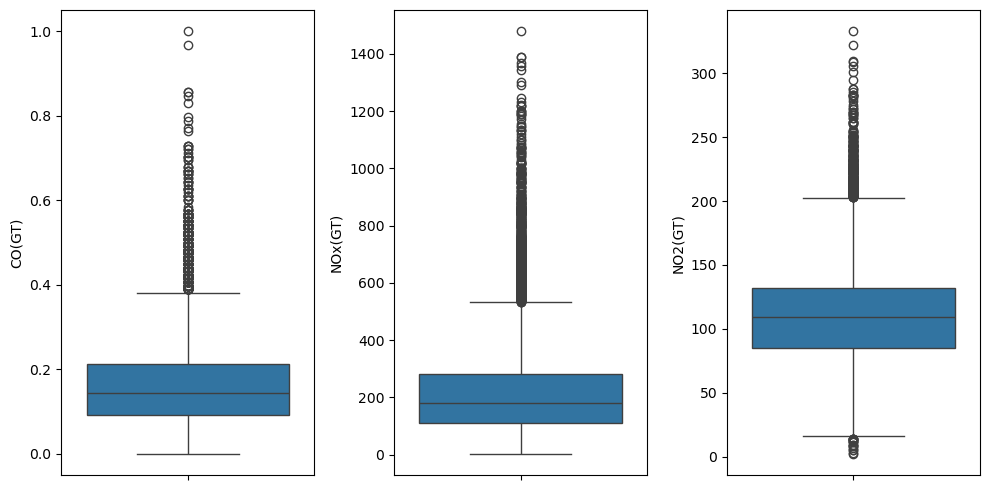

In [52]:
cols_to_impute = ["CO(GT)", "NOx(GT)", "NO2(GT)"]

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

for i, col in enumerate(cols_to_impute):
    sns.boxplot(y=df[col], ax=axs[i])

plt.tight_layout()
plt.show()

Kita dapat melihat bahwa ketiga kolom tersebut memiliki nilai ekstrem yang cukup banyak. Karena itu kita akan menggunakan median untuk impute missing value

In [37]:
# Impute missing value dengan median
df[cols_to_impute] = df[cols_to_impute].fillna(df[cols_to_impute].median())

# Drop baris dengan missing values di kolom lain
df.dropna(inplace=True)

In [38]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Sekarang dataset sudah tidak memiliki missing value sehingga sudah siap untuk dilakukan analisis

# Analisa Dataset

Setelah dataset dibersihkan, kita dapat melakukan analisa untuk mengetahui hubungan antar fitur atau variable pada dataset

## CO(GT) & PT08.S1()
Pada bagian ini, kita akan melakukan analisa terhadap fitur pengukuran *Carbon Monoxide* yang berasal dari nilai pengukuran aktual (**CO(GT)**) dan dari sensor CO yang dipasang (**PT08.S1(CO)**)

In [39]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.069314,1099.833166,10.083105,939.153376,231.156935,835.493605,111.586142,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.304487,217.080037,7.449820,266.831429,188.619449,256.817320,43.205808,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.200000,937.000000,4.400000,734.500000,112.000000,658.000000,85.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.600000,1231.000000,14.000000,1116.000000,280.000000,969.500000,132.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


Jika kita melihat distribusi data, kita dapat melihat bahwa beberapa kolom terutama data pengukuran dari sensor memiliki simpangan baku yang cukup tinggi yang berarti data memiliki variasi yang cukup besar. Dalam kasus CO(GT) dan PT08.S1(CO) yang mana merupakan pengukuran dari tingkat *Carbon Monoxide*, kita dapat melihat bahwa kedua fitur ini memiliki simpangan baku yang berbeda meskipun kedua kolom tersebut mengukur polutan yang sama. Beberapa hal yang bisa menyebabkan hal ini terjadi adalah

- Sensor mungkin sangat sensitif terhadap perubahan kecil
- Adanya outlier pada sensor yang disebabkan kesalahan sensor

Untuk itu, kita akan melakukan visualisasi untuk melihat lebih jelas lagi

### Distribusi Data

Kita akan menggunakan histogram untuk melihat distribusi kedua fitur

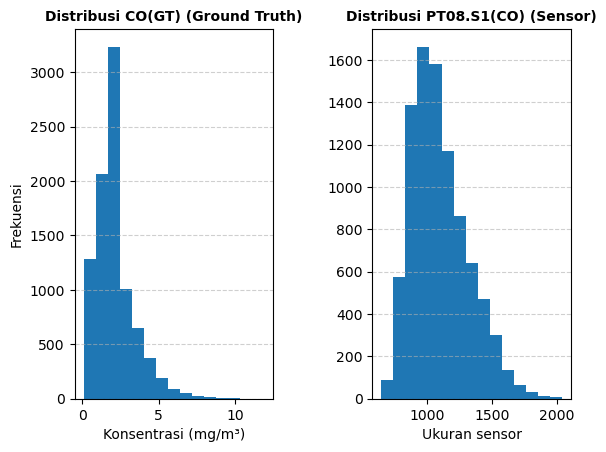

In [40]:
# Plot menggunakan histogram
n_bins=15

fig, axs = plt.subplots(1,2)

axs[0].hist(df["CO(GT)"], bins=n_bins)
axs[0].set_title("Distribusi CO(GT) (Ground Truth)", fontsize=10, fontweight="bold")
axs[0].set_xlabel("Konsentrasi (mg/m³)")
axs[0].set_ylabel("Frekuensi")
axs[0].grid(axis="y", linestyle="--", alpha=0.6)

axs[1].hist(df["PT08.S1(CO)"], bins=n_bins)
axs[1].set_title("Distribusi PT08.S1(CO) (Sensor)", fontsize=10, fontweight="bold")
axs[1].set_xlabel("Ukuran sensor")
axs[1].grid(axis="y", linestyle="--", alpha=0.6)

plt.subplots_adjust(wspace=0.5)

plt.show()

Meskipun ukuran CO dari aktual dan sensor memiliki simpangan baku yang berbeda, kita dapat melihat bahwa kedua fitur cenderung memiliki nilai yang terkonsentrasi di nilai rendah (*right-skewed*) meskipun tidak terlalu mirip.

Ada beberapa hal yang mungkin mengakibatkan hal ini seperti: 
- Bisa jadi tingkat CO biasanya cukup rendah pada hari-hari biasa namun bisa melonjak cukup tinggi jika lalu lintas cukup padat
- Sensor bisa jadi menghasilkan angka dalam skala yang lebih besar disebabkan skala pengukuran yang berbeda dengan pengukuran nilai aktual

Untuk memastikan apakah sensor benar-benar merefleksikan nilai aktual tingkat CO, kita akan melakukan analisa lebih lanjut

### Standarisasi dan Normalisasi

Agar lebih mudah membandingkan, kita akan mencoba membuat kedua fitur memiliki skala yang sama dengan bantuan scaler dari library *scikit-learn*

In [41]:
scaler = MinMaxScaler()
df[["CO(GT)", "PT08.S1(CO)"]] = scaler.fit_transform(df[["CO(GT)", "PT08.S1(CO)"]]) 

### Melihat korelasi data
Setelah melakukan standarisasi dan normalisasi, kita akan melihat tingkat korelasi kedua fitur untuk melihat keterhubungan keduanya

In [42]:
correlation = df[["CO(GT)", "PT08.S1(CO)"]].corr()
print(f"Korelasi CO aktual dan sensor: {correlation}")

Korelasi CO aktual dan sensor:                CO(GT)  PT08.S1(CO)
CO(GT)       1.000000     0.806921
PT08.S1(CO)  0.806921     1.000000


Jika kita lihat hasil dari *correlation matrix* kedua data, pengukuran CO aktual dan sensor memiliki korelasi yang cukup besar yaitu **0.806** atau sekitar **80%**

Berdasarkan hasil ini, kita dapat menyimpulkan bahwa sensor tidak benar-benar 100% presisi. Bisa jadi ada faktor lain yang mempengaruhi pengukuran sensor CO seperti suhu dan kelembapan udara

## Hubungan linear kedua fitur
Untuk melihat lebih jelas lagi, kita akan melihat scatter plot dari kedua fitur untuk melihat hubungan linier

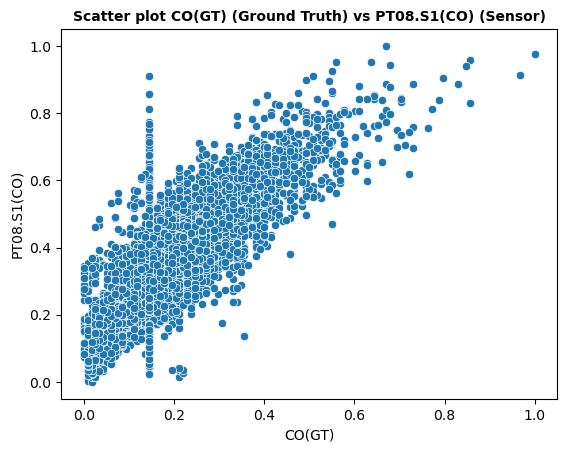

In [43]:
sns.scatterplot(x=df["CO(GT)"], y=df["PT08.S1(CO)"])
plt.title("Scatter plot CO(GT) (Ground Truth) vs PT08.S1(CO) (Sensor)", fontsize=10, fontweight="bold")
plt.show()

Kita dapat melihat bahwa pengukuran CO aktual dan sensor memiliki korelasi dengan tren positif. Namun karena nilai korelasinya tidak sempurna, kita dapat mengartikan bahwa hasil pengukuran sensor tidak 100% sama dengan nilai aktual namun sensor sudah cukup merefleksikan nilai aktual dengan baik

## NO2(GT) & T

Selanjutnya kita akan melihat bagaimana hubungan antara dua fitur lainnya yaitu *temprature* dan *Nitrogen Dioxide*.

*Nitrogen Dioxide* merupakan sejenis polutan yang dapat mengiritasi paru-paru dan juga berkontribusi pada smog (*smoke gas*). Polutan ini dapat dihasilkan akibat hasil pembakaran bahan bakar fossil seperti batu bara dan gas. Kita akan melihat apakah *Nitrogen Dioxide* memiliki keterhubungan dengan suhu

### Melihat korelasi data

Mari kita coba lihat korelasi antar kedua fitur lalu kita akan menggunakan heatmap untuk menggambarkan hasil correlation matrix

In [44]:
corr_matrix = df[["NO2(GT)", "T"]].corr()

print(f"Korelasi NO2 dan suhu: {corr_matrix}")

Korelasi NO2 dan suhu:           NO2(GT)         T
NO2(GT)  1.000000 -0.174707
T       -0.174707  1.000000


### Menggunakan heatmap

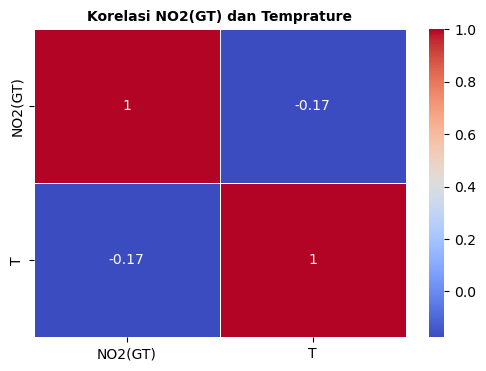

In [45]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Korelasi NO2(GT) dan Temprature", fontsize=10, fontweight="bold")

plt.show()

Kita dapat melihat bahwa *Nitrogen dioxide* memiliki korelasi negatif yang cukup lemah dengan tempratur yang berarti ketika tempratur meningkat, tingkat NO2 pada udara cenderung menurun sedikit namun hal ini juga dapat dipengaruhi faktor lain seperti

- Kecepatan angin
- Aktivitas industri
- Kelembaban

## NO2(GT) & AH

Untuk melihat apakah kelembaban juga memiliki faktor yang mungkin mempengaruhi tingkat NO2 di udara, kita akan mencoba melihat keterhubungan antar kedua fitur tersebut. AH merupakan *Absolute Humidity* yang mengukur jumlah kelembaban sebenarnya di udara tanpa relatif terhadap suhu. 

### Melihat korelasi kedua fitur

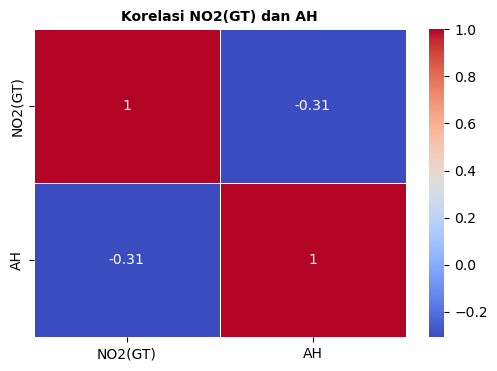

In [46]:
corr_matrix = df[["NO2(GT)", "AH"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Korelasi NO2(GT) dan AH", fontsize=10, fontweight="bold")

plt.show()

Jika kita lihat, NO2 dan AH memiliki korelasi negatif *moderate* yang artinya ketika AH meningkat, tingkat NO2 di udara cenderung turun. Hal ini menunjukan korelasi yang lebih kuat dari temprature. Hal ini bisa disebabkan oleh

- Tingkat kelembaban memiliki reaksi yang lebih kuat terhadap NO2

### Hubungan linear kedua fitur

Untuk melihat lebih jelas, kita akan melihat hubunga linear kedua fitur menggunakan scatter plot

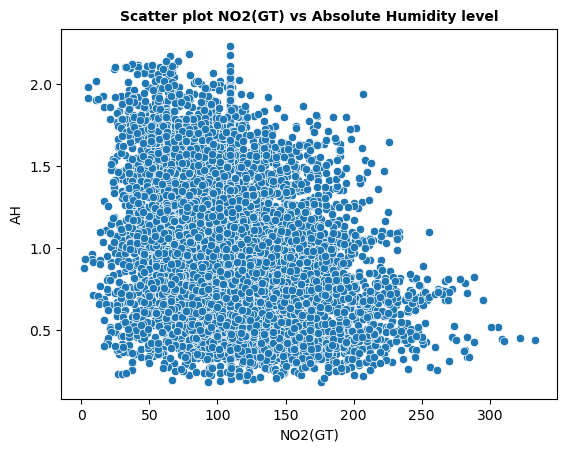

In [47]:
sns.scatterplot(x=df["NO2(GT)"], y=df["AH"])
plt.title("Scatter plot NO2(GT) vs Absolute Humidity level", fontsize=10, fontweight="bold")
plt.show()

## NO2(GT), T, dan AH

Berdasarkan hasil analisa yang sudah kita lakukan, ada kemungkinan kelembaban menjadi faktor yang mempengaruhi korelasi lemah antara NO2 dan T. Untuk itu kita akan melihat korelasi antara ketiga fitur tersebut

### Melihat korelasi ketiga fitur

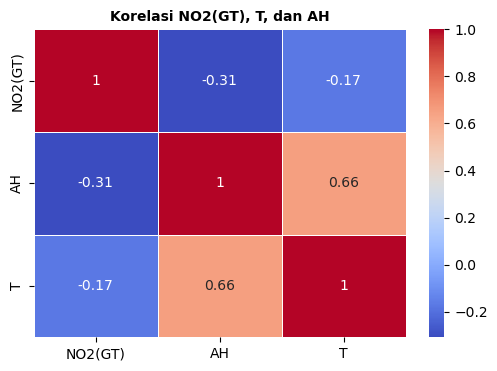

In [48]:
corr_matrix = df[["NO2(GT)", "AH", "T"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Korelasi NO2(GT), T, dan AH", fontsize=10, fontweight="bold")

plt.show()

Kita dapat melihat korelasi positif yang cukup kuat antara AH dan suhu. Hal ini tentunya masuk akal karena semakin tinggi suhu, semakin banyak juga uap air di udara. Karena AH dan suhu berkorelasi cukup kuat, bisa jadi efek suhu terhadap NO₂ tidak langsung.